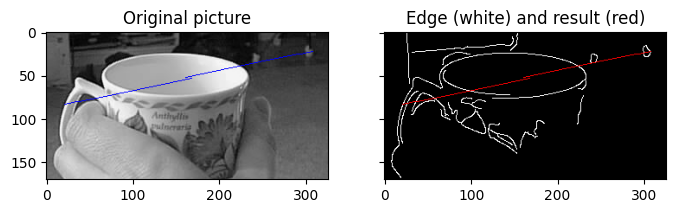

In [39]:
# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=40, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box'})

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

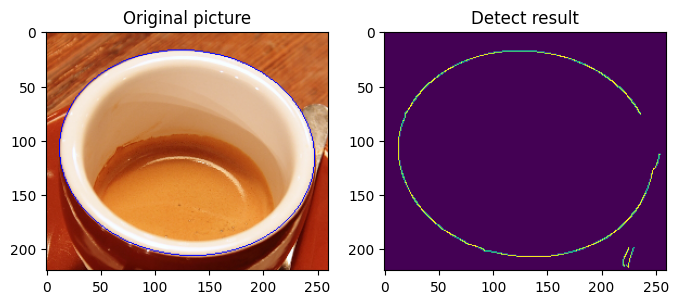

In [34]:
# coding=utf-8

import matplotlib.pyplot as plt
from skimage import data,draw,color,transform,feature

#加载图片，转换成灰度图并检测边缘
image_rgb = data.coffee()[0:220, 160:420] #裁剪原图像，不然速度非常慢
image_gray = color.rgb2gray(image_rgb)
edges = feature.canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

#执行椭圆变换
result =transform.hough_ellipse(edges, accuracy=20, threshold=250,min_size=100, max_size=120)
result.sort(order='accumulator') #根据累加器排序

#估计椭圆参数
best = list(result[-1])  #排完序后取最后一个
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

#在原图上画出椭圆
cy, cx =draw.ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255) #在原图中用蓝色表示检测出的椭圆

# #分别用白色表示canny边缘，用红色表示检测出的椭圆，进行对比
# edges = color.gray2rgb(edges)
# edges[cy, cx] = (250, 0, 0) 

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Detect result')
ax2.imshow(edges)

plt.show()


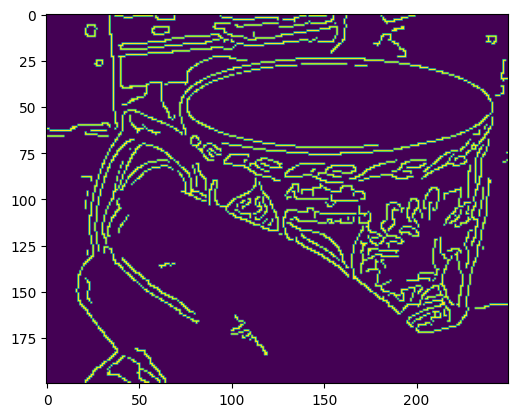

In [22]:
import skimage
import matplotlib.pyplot as plt
#读取图片
image = skimage.io.imread('testdata/0859.jpg')

#二值化
image = skimage.color.rgb2gray(image)

#边缘检测
image = skimage.feature.canny(image)

image = image[0:200,200:450]
#预览
plt.imshow(image)
import matplotlib.pyplot as plt
from skimage import data,draw,color,transform,feature
plt.show()

In [23]:
import matplotlib.pyplot as plt
from skimage import data,draw,color,transform,feature

#执行椭圆变换
result =transform.hough_ellipse(image, accuracy=20, threshold=250,min_size=100, max_size=120)
result.sort(order='accumulator') #根据累加器排序

#估计椭圆参数
best = list(result[-1])  #排完序后取最后一个
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

#在原图上画出椭圆
cy, cx =draw.ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255) #在原图中用蓝色表示检测出的椭圆

# #分别用白色表示canny边缘，用红色表示检测出的椭圆，进行对比
# edges = color.gray2rgb(edges)
# edges[cy, cx] = (250, 0, 0) 

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Detect result')
ax2.imshow(edges)

plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0